# Which Factors Influence the Price of Health Insurance?

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest



# EDA and Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

First we'll see how the "expenses" are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

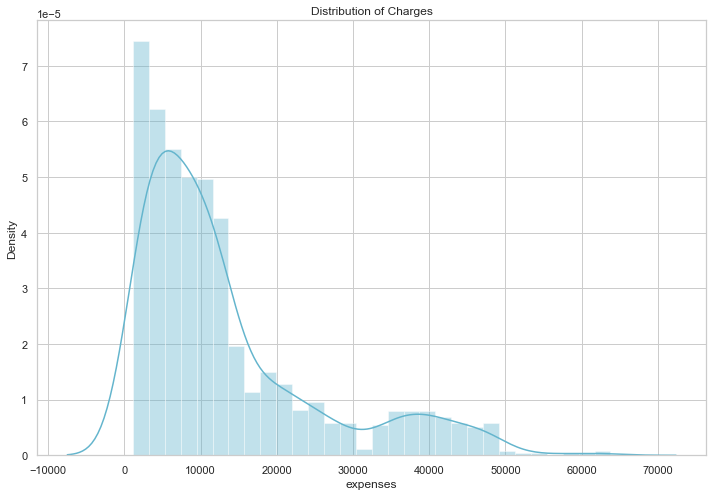

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['expenses'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

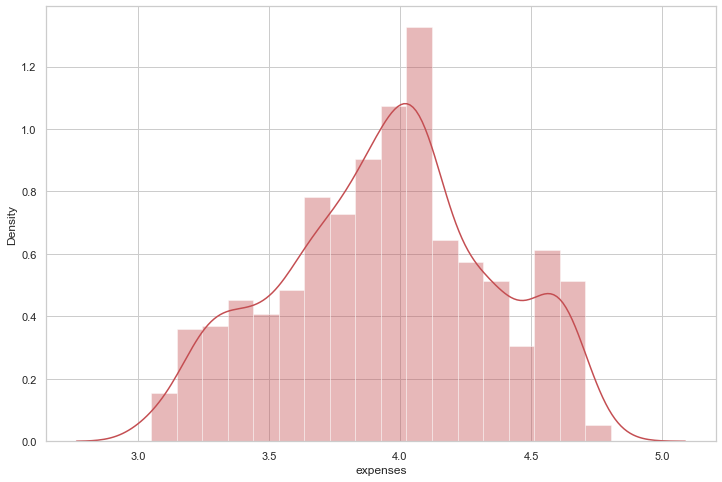

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['expenses']), kde = True, color = 'r' )

Now let's look at the charges by region

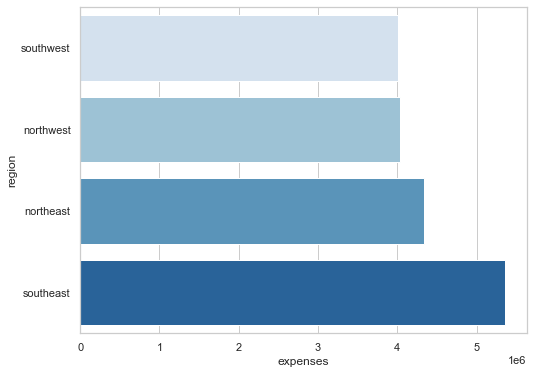

In [9]:
charges = df['expenses'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

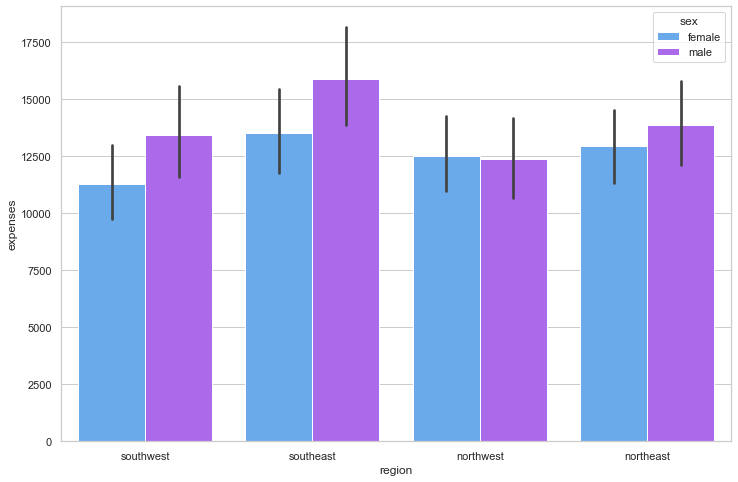

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='expenses', hue='sex', data=df, palette='cool')

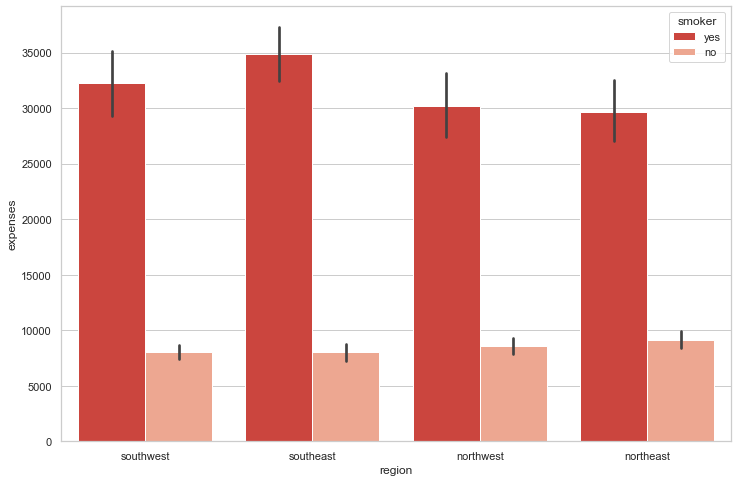

In [11]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'expenses',
                 hue='smoker', data=df, palette='Reds_r')

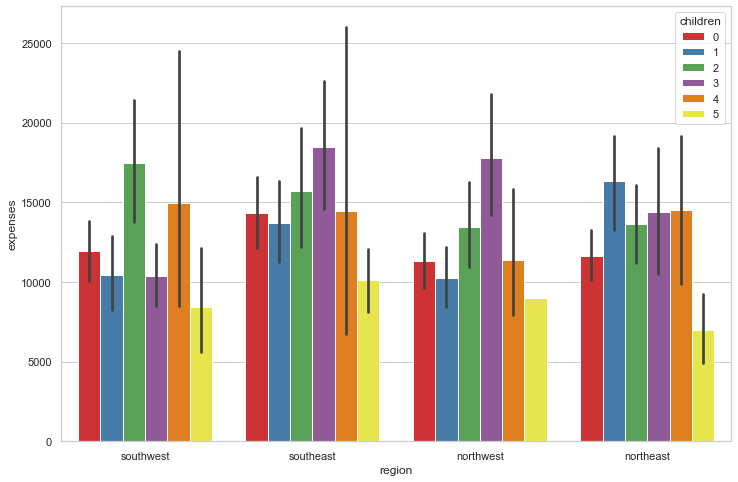

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='expenses', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

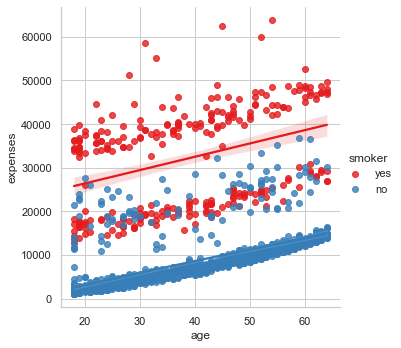

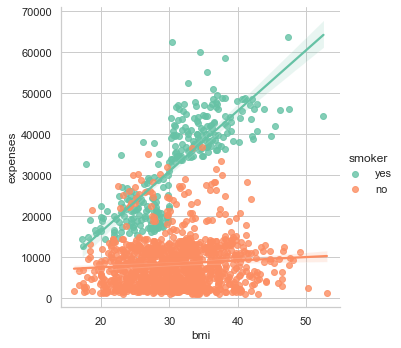

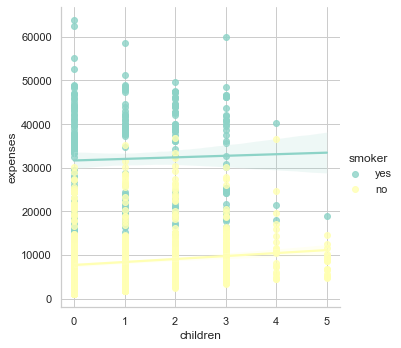

In [13]:
ax = sns.lmplot(x = 'age', y = 'expenses', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'expenses', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'expenses', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

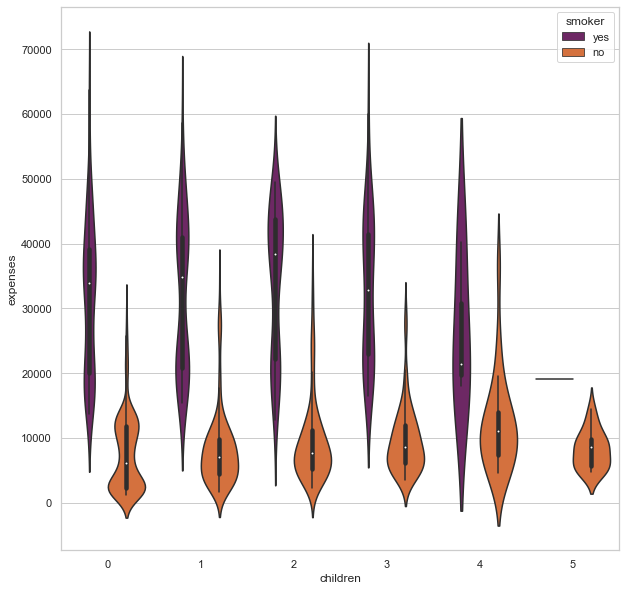

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'expenses', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [15]:
##Converting objects labels into categorical
# sex          object
# smoker       object
# region       object

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

In [16]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
expenses    float64
dtype: object

In [17]:
df.sample(3)

,age,sex,bmi,children,smoker,region,expenses
429,27,0,30.4,3,0,1,18804.75
977,26,1,29.2,1,0,2,2902.91
624,59,1,28.8,0,0,1,12129.61


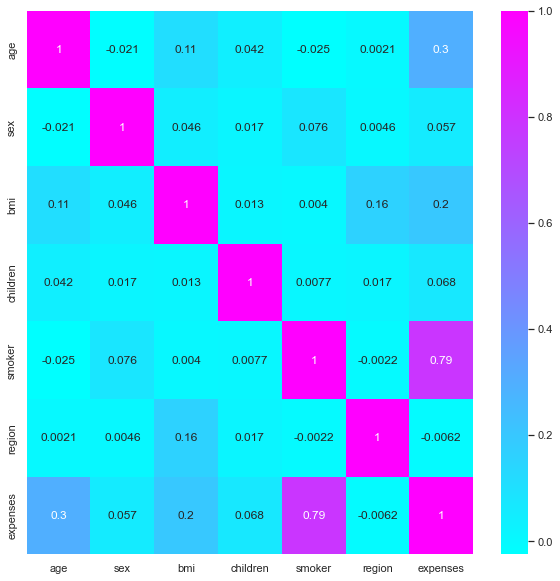

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

# Linear Regression

In [19]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['expenses'], axis = 1)
y = df['expenses']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11663.165438316812
[  253.96534178   -24.55552531   328.44727833   444.00441091
 23567.59812625  -288.36371592]
0.7999053396503135


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

# Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11644.655459761228
[ 2.53867192e+02 -2.17424263e+01  3.28385403e+02  4.44513379e+02
  2.34996902e+04 -2.88884033e+02]
0.7997294610659681


# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11663.020875886215
[  253.96492291   -23.68796788   328.4341174    443.86254424
 23566.33224193  -288.19546248]
0.7998996495359558


# Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['expenses'], axis=1)
y = df.expenses
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3629177.363, MSE test data: 19576633.356
R2 train data: 0.971, R2 test data: 0.879


In [23]:
##Predicting the charges
y_test_pred = Rfr.predict(x_test)
##Comparing the actual output values with the predicted values
df_pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_pred_rf

,Actual,Predicted
578,9724.53,11849.8105
610,8547.69,10363.7981
569,45702.02,44608.5866
1034,12950.07,13295.9954
198,9644.25,10243.5739
...,...,...
1084,15019.76,16542.1783
726,6664.69,6566.4293
1132,20709.02,11800.9467
725,40932.43,41113.6492


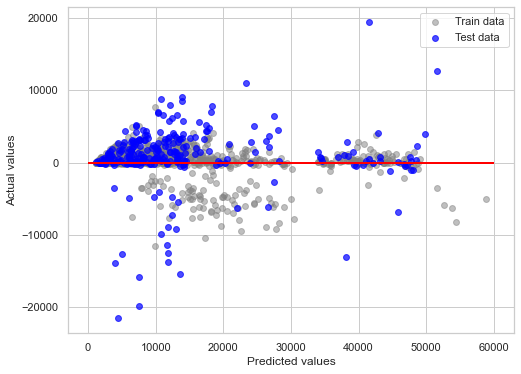

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.217628)
3.age(0.137285)
4.children(0.021391)
5.region(0.015670)
6.sex(0.006348)


<BarContainer object of 6 artists>

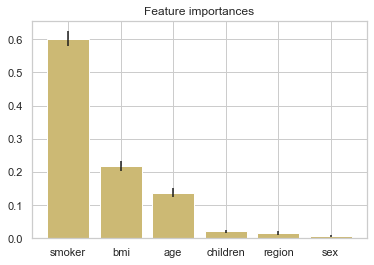

In [25]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

# Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['expenses', 'sex', 'region'], axis = 1)
y = df.expenses
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print('ACC:\n',Pol_reg.score(x_test, y_test))

-5354.647391939021
[ 0.00000000e+00 -4.04155050e+01  5.25877542e+02  8.56502619e+02
 -9.52975693e+03  3.04158571e+00  1.85984456e+00  6.04041172e+00
  3.92334477e+00 -9.43186301e+00  3.64323641e+00  1.40859638e+03
 -1.46059782e+02 -4.43010212e+02 -9.52975693e+03]
ACC:
 0.881363873378441


In [27]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2823.3592617760964
Mean Squared Error: 18878562.434177123
Root Mean Squared Error: 4344.946770005027


In [28]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53,12102.729417
610,8547.69,10444.347881
569,45702.02,48577.485021
1034,12950.07,14140.096817
198,9644.25,8640.559661
...,...,...
1084,15019.76,16713.701874
726,6664.69,8655.951883
1132,20709.02,12370.700280
725,40932.43,41525.430368


Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model